# **"Absorption correction routines for multiple samples with arbitrary shapes.**
#### The documentation can be found at: https://arxiv.org/abs/2410.08313
#### The absorption correction program includes predefined samples like cuboids, cylinders, half-cylinders, spheres, etc.

# ----------------------------------------------------------

### **Absorption correction for three samples.**


In [2]:
# Download and Install abscorr program
!git clone https://github.com/macsatncnr/abscorrpython
%cd abscorrpython
import numpy as np
import abscorr as abcr
import time

Cloning into 'abscorrpython'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 27 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 87.76 KiB | 998.00 KiB/s, done.
Resolving deltas: 100% (13/13), done.
/content/abscorrpython


In [3]:
def three_samples():
    """
    example of how to define three samples

    returns a list of 3 dictionaries with the samples information
    cube sample: 2x2x2cm cube located at (2,2,2)
    shpere sample: radius=2cm  located at (-2,-2,-2)
    cylinder sample: raius=1.5cm lenght=1.5cm located at (-2,2,0)

    """

    cubsmpl = abcr.smpl_trans(abcr.boxsample(1.0,1.0,1.0),[1.0,1.0,1.0])
    sphsmpl = abcr.smpl_trans(abcr.sphere_sample(1.0),[-1.0,-1.0,-1.0])
    cylsmpl = abcr.smpl_trans(abcr.cylinder_sample(1.0,1.5),[-1.5,1.5,0.0])
    samples=[cylsmpl, sphsmpl, cubsmpl]
    return samples

In [4]:
def three_samples_transm(theta,twotheta,**kwargs):
    """
    Example program to calculate the transmission of multiple samples

    Parameters
    ----------
    theta : float
        theta value
    twotheta : fluat
        twotheta value.

    Returns
    -------
    absorption : fluat
        Calculated transmission given a theta and twotheta value for a sample define as a box.

    """

    s0=[0.0,1.0,0.0]    #   Incident beam
    s=[0.0,1.0,0.0]     #   Scattered beam

    mu_ei=2.0
    mu_ef=2.0

    # We must rotate s and s0 -theta degrees and then s twotheta degrees
    # The vectors s and s0 rotates in oposite direction of the sample.

    ss0=abcr.srotxy(s0,-1*theta)          # We rotate incident beam s0 along xy axis -theta deg
    ss=abcr.srotxy(abcr.srotxy(s,-1*theta),twotheta)  # We We rotate scattered beam s along xy axis -theta deg and another twotheta deg along xy axis

    transm=abcr.integ(ss0, ss, three_samples(),mu_ei,mu_ef)
    print(theta,twotheta,transm)
    if 'file_out' in kwargs:
       file2write=kwargs["file_out"]
       with open(file2write, 'a') as ff:
           np.savetxt(ff,[[theta,twotheta,transm]],fmt='%1.3f',delimiter='\t')

    if 'return_list' in kwargs:
        return_list=kwargs["return_list"]
        return_list.append([theta,twotheta,transm])
    return transm

In [5]:
def trans_sample_sequential(angles,**kwargs):
    """
    Parameters
    ----------

    angles:
                angles :    Two columns list [theta, twotheta]
                            List with two columns list of floats
                            [theta, twotheta] values to compute transmission.

                            String
                            if  angles is a "string" then angles is a file name
                            with the angles theta_twotheta.
                            The file  must have two columns list of floats  [theta, twotheta]


    **kwargs :  file_out :  file to save the calculated transmission with 3 columns:
                            [theta, twotheta, transmission]

    Returns
    -------
                A list with with three columns [theta, twotheta, transmission]
    """
    startime=time.time()
    if type(angles)==str:
        file2read=angles
        with open(file2read, 'r') as ff:
            angles=np.loadtxt(ff)

    if 'file_out' in kwargs:
       file2write=kwargs["file_out"]
       ff=open(file2write, 'w')
       ff.close()

    transmi=[three_samples_transm(angle[0],angle[1],**kwargs) for angle in angles]

    print('done.', time.time()-startime)
    return transmi


In [6]:
def trans_test():
    """

    Returns
    -------
    None.

    Calculate the transmission sequencially and save it to test_cylinder90.txt'
    For multiprocessign see file cylinder_90deg_mpt.py


    """
    range_theta=[0,360,20]
    range_twotheta=[0,200,20]
    angles=abcr.generate_Sample_theta_2theta(range_theta, range_twotheta)
    file_out='test_three_smpl.txt'
    trans_sample_sequential(angles,file_out=file_out)

In [7]:
def plot_transmission():
    abcr.generate_contour_plot("test_three_smpl.txt")

In [ ]:
trans_test()
plot_transmission()

0 0 0.05255760140864401
0 20 0.054065950225077056
0 40 0.06256300738446587
0 60 0.08187066257055153
0 80 0.09327159073499085
0 100 0.10703641162230373
0 120 0.1275201282728943
0 140 0.1414315681907386
0 160 0.15147072675540127
0 180 0.1543894513367414
20 0 0.06429331718261819
20 20 0.06329419032071822
20 40 0.067080116900528
20 60 0.08190471090284758
20 80 0.10684777410717118
20 100 0.12082830684719545
20 120 0.1366567000965588
20 140 0.15712021118710529
20 160 0.168577193324891
20 180 0.17247463902575916
40 0 0.07179812182480537
40 20 0.07313967684734686
40 40 0.0791380709611698
40 60 0.08478497842200444
40 80 0.10570065767668121
40 100 0.13306207436580883
40 120 0.14655337645251143
40 140 0.16060686244028682
40 160 0.17660327178535282
40 180 0.18086955945423303
60 0 0.07142633527180867
60 20 0.07523752261551937
60 40 0.08374278434994546
60 60 0.093205449532564
60 80 0.09807419688867762
60 100 0.12287238483932168
60 120 0.14991734081786315
60 140 0.16107995126459296
60 160 0.171445370

(2701, 3)


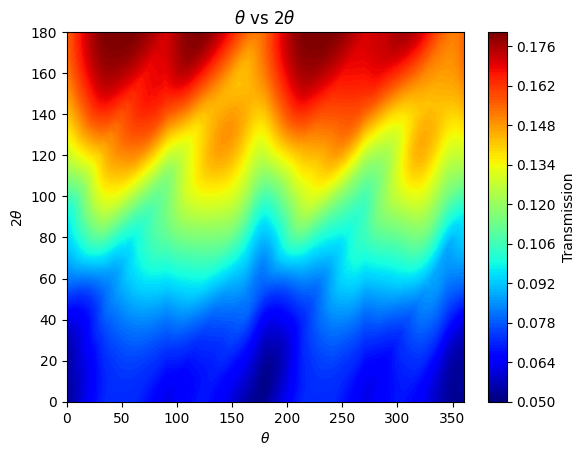

In [8]:
plot_transmission()

Download file.

In [ ]:
from google.colab import files
files.download("test_three_smpl.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>